In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df_music=pd.read_csv("../Data/cleaned_music_ds.csv")

## K Means Clustering Without Scaling

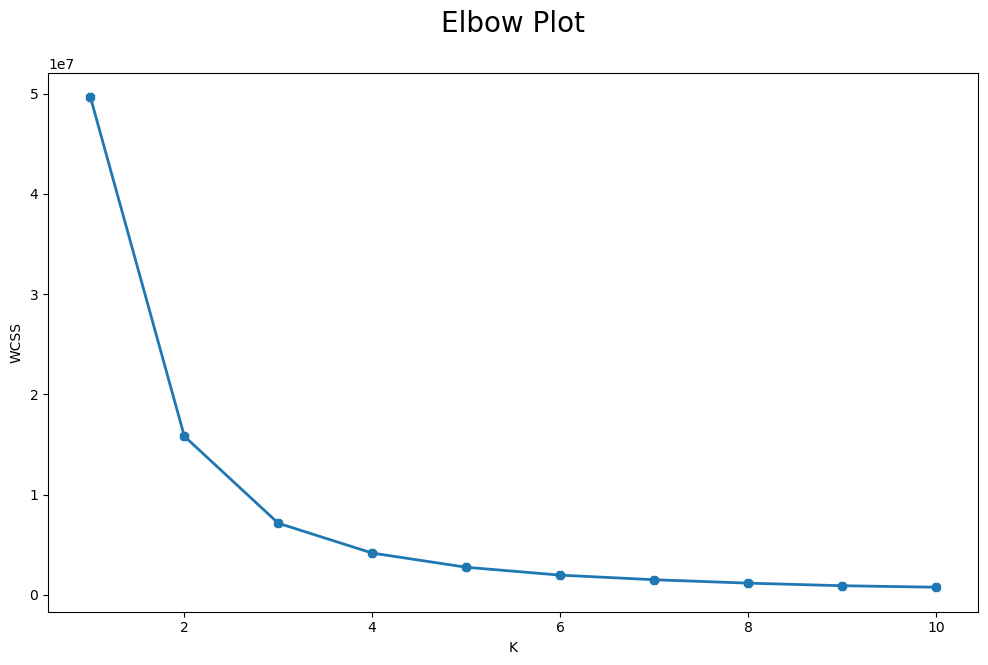

In [5]:
# create an elbow plot of WSS


X1 = df_music.loc[:,['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

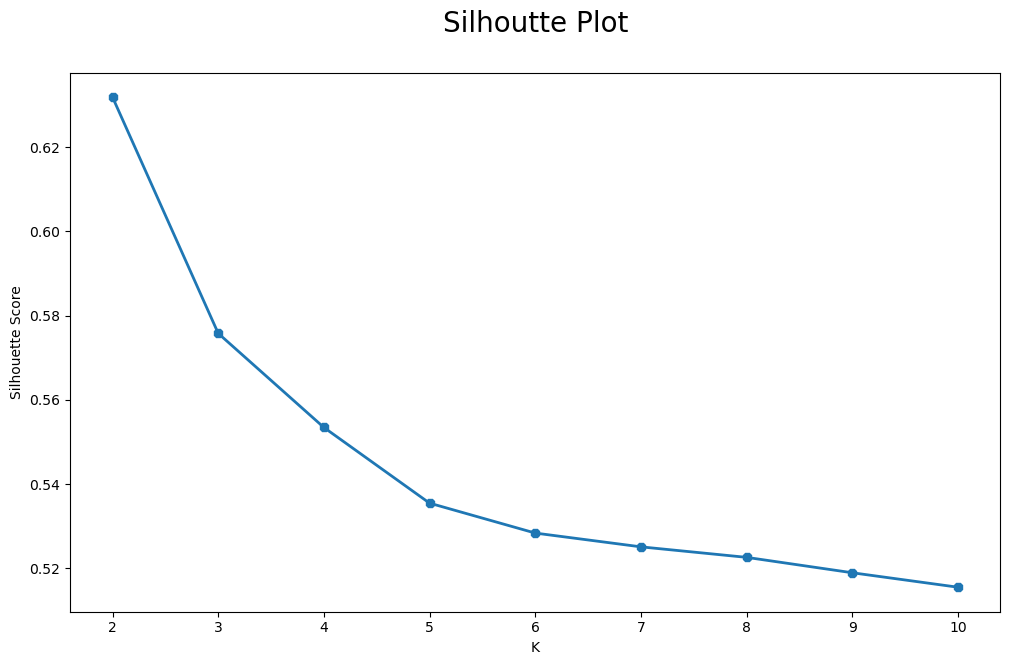

In [6]:
# Create a plot of Silhoutte Score

silhouette = []
for k in range(2, 11):
   #create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()



 **The elbow plot and silhoutte plot optimal k is 2**

In [7]:
#Create a KMeans object with this optimal number of clusters. Name this object `kmeans`
kmeans= KMeans(n_clusters=2, init ="k-means++", n_init=20,random_state=30)

#Fit KMeans object using ""X1" data
kmeans.fit(X1)

KMeans(n_clusters=2, n_init=20, random_state=30)

In [8]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [9]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.33048398e+01, 2.17235562e-02, 1.13684578e-01, 1.30860407e-01,
        6.05778398e-02, 1.55403652e-02, 1.71149082e-02, 5.63898705e-02,
        7.94630507e-02, 6.02114814e-02, 6.51910069e-02, 4.21535954e-02,
        5.14958835e-02, 2.40541303e-02, 1.46501246e-01, 3.18133477e-02,
        4.58547046e-01],
       [1.33491185e+02, 1.92282656e-02, 1.32736019e-01, 9.07117330e-02,
        4.74802181e-02, 2.31747413e-02, 1.68310124e-02, 2.50315246e-02,
        6.80300967e-02, 2.10513434e-01, 4.43603824e-02, 6.35489124e-02,
        4.13822738e-02, 2.44634907e-02, 7.69898834e-02, 2.84874210e-02,
        3.22776879e-01]])

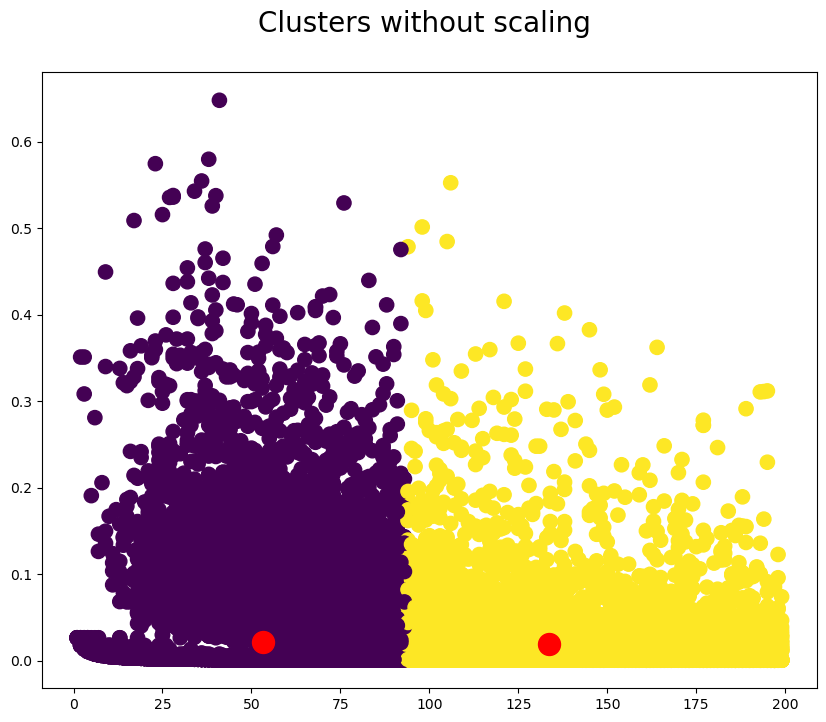

In [10]:
# view 2D clusters

plt.figure(figsize = (10, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters without scaling \n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

## K Means Clustering  with Scaling

In [11]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

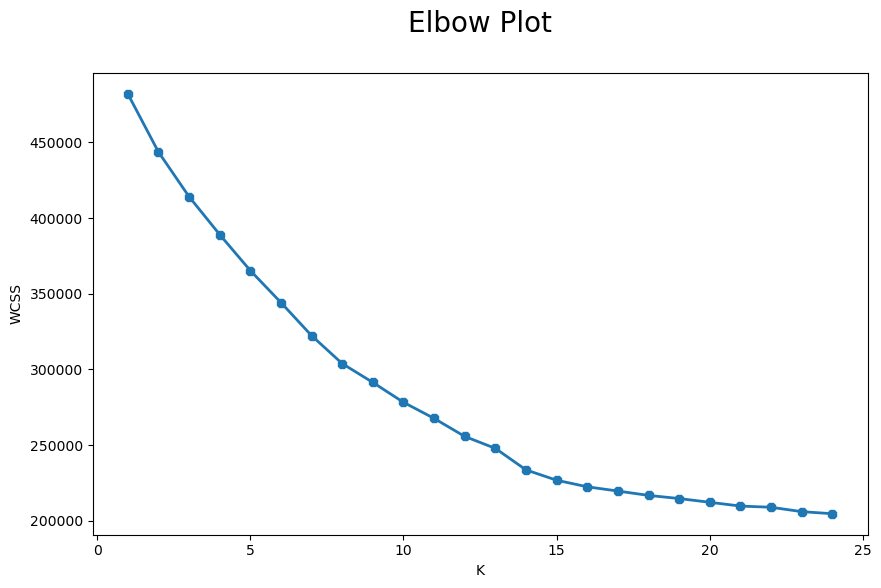

In [12]:
wcss_scaled = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',n_init=20,random_state=30)

    #Fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    #Append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))

plt.plot(range(1, 25), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show() 

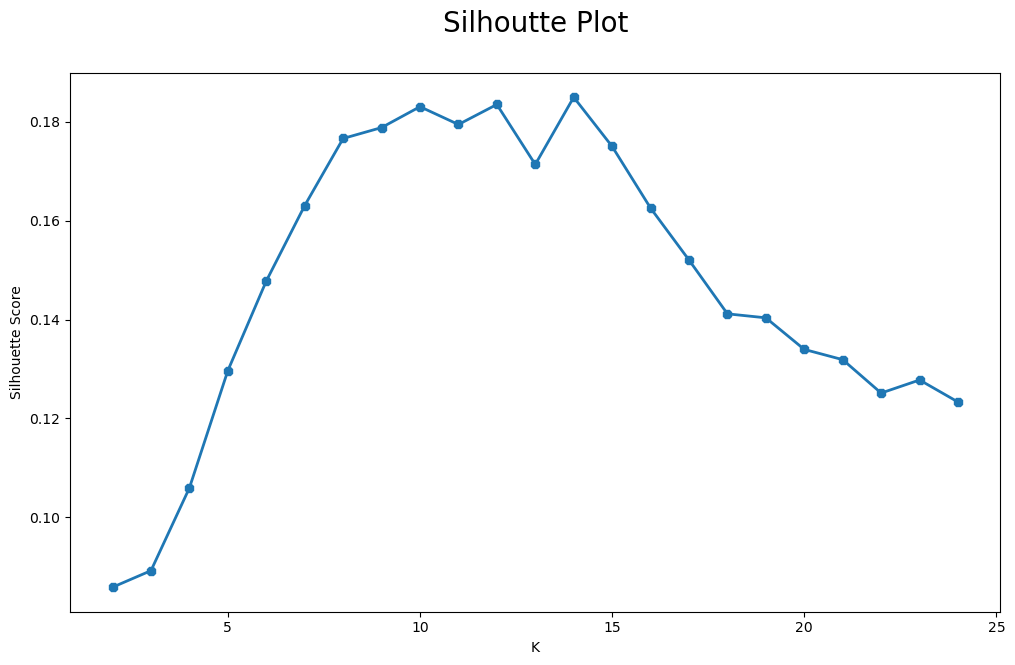

In [13]:
scaler = StandardScaler()

#Fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)


#Create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 25):
    # Create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans (n_clusters = k, init = 'k-means++',n_init=20,random_state=30)
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 25), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

**The optimal k for both elbow plot and sihouette plot is 13**

In [14]:
#Create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters=13,init="k-means++",n_init=20,random_state=30)

#Fit this KMeans object on your data

kmeans.fit_transform(X1_scaled)

array([[5.36401905, 4.62796437, 4.0601441 , ..., 5.38939236, 2.87407834,
        5.21173361],
       [5.28329349, 2.72331913, 5.16483844, ..., 3.46706903, 5.29521407,
        5.32950426],
       [6.33071803, 5.37392195, 5.30256982, ..., 6.37629484, 4.93288353,
        5.06191073],
       ...,
       [3.77276284, 3.9424423 , 3.79669262, ..., 4.63751627, 4.56536474,
        5.00102646],
       [5.15338018, 5.13471596, 4.95640489, ..., 3.86671034, 5.2293177 ,
        5.71412483],
       [5.46354493, 5.68328585, 5.23496105, ..., 5.85066241, 5.63716729,
        6.27012447]])

In [15]:
#Generate labels for the  dataset

labels =  kmeans_scaled.fit_predict(X1_scaled)
labels

array([ 3,  0, 10, ...,  7,  7,  7], dtype=int32)

In [16]:
# Get centroids of clusters

Scaled_centroids = kmeans.cluster_centers_
Scaled_centroids

array([[ 8.05016232e-02, -2.46921809e-01,  5.67853370e-02,
        -1.46438384e-01, -1.88694563e-01, -1.84159328e-01,
        -1.04634848e-01, -2.62828823e-01, -4.39084330e-01,
        -1.62741990e-02, -1.40487866e-01,  3.06657790e+00,
        -2.30549077e-01, -1.45396670e-01, -2.61596495e-01,
        -2.52647307e-01,  5.31157573e-02],
       [-5.69307450e-01, -1.76343731e-01, -4.68104391e-01,
         2.11073564e+00, -1.65159407e-01, -2.38125204e-01,
        -1.77202904e-01,  2.36874122e-03, -4.47799521e-01,
        -4.53613405e-01, -1.53902510e-01, -1.94896185e-01,
        -6.27620581e-02, -1.14993777e-01, -2.67863090e-01,
        -7.27147955e-02,  8.82370595e-01],
       [-1.76104792e-01, -2.37591241e-01,  1.52551284e+00,
        -5.21783505e-01, -2.83858369e-01, -1.64822932e-01,
        -1.42845815e-01, -2.93281384e-01,  1.72361913e+00,
        -3.83507518e-01, -3.41306476e-01, -2.78964083e-01,
        -2.81807800e-01, -1.40725988e-01, -5.12882456e-01,
        -1.27745826e-01, -2.7

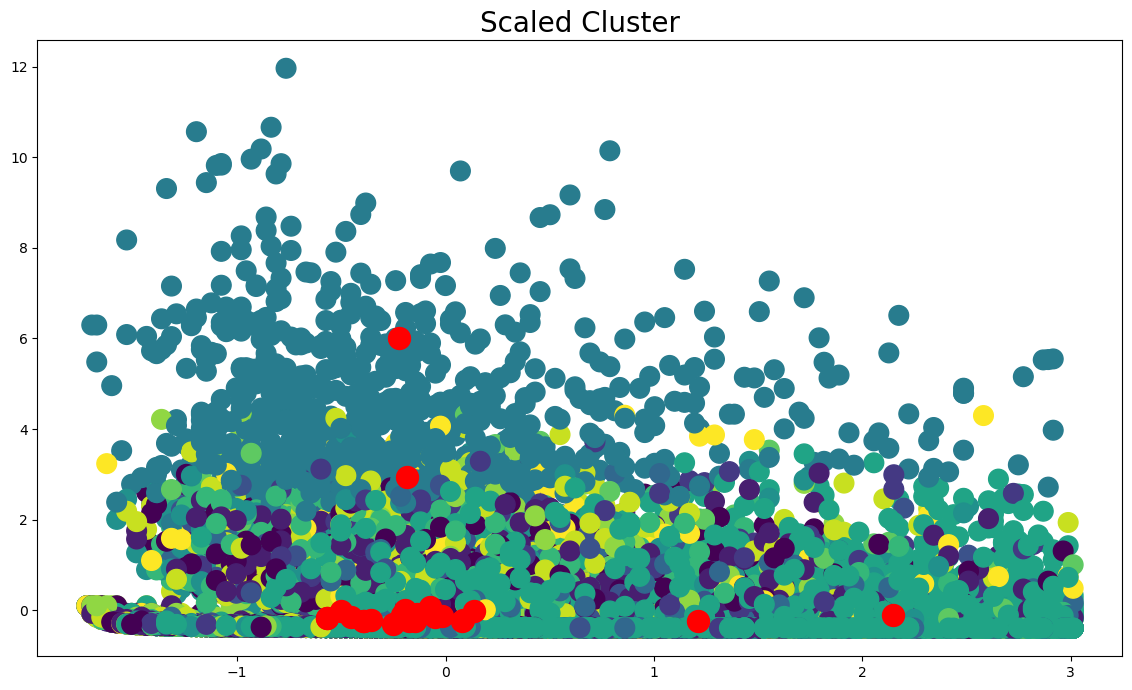

In [17]:
###view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 200)
plt.scatter(Scaled_centroids[:, 0],Scaled_centroids [:, 1], color = 'red', s = 250)
plt.title("Scaled Cluster", fontsize = 20)
plt.xlabel("")
plt.ylabel("")
plt.show()

###  Scaling the dataset helped to identify more features but as for clustering it wasn't as helpful. Currently there are too many features lets try PCA to reduce some of those features


## Clustering with PCA

In [18]:
# Using PCA from sklearn PCA
pca = PCA(n_components=3)
ds_pca= pca.fit_transform(X1_scaled)


In [19]:
#set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=13, random_state=30)
clusters = kmeans_scaled.fit_predict(ds_pca)

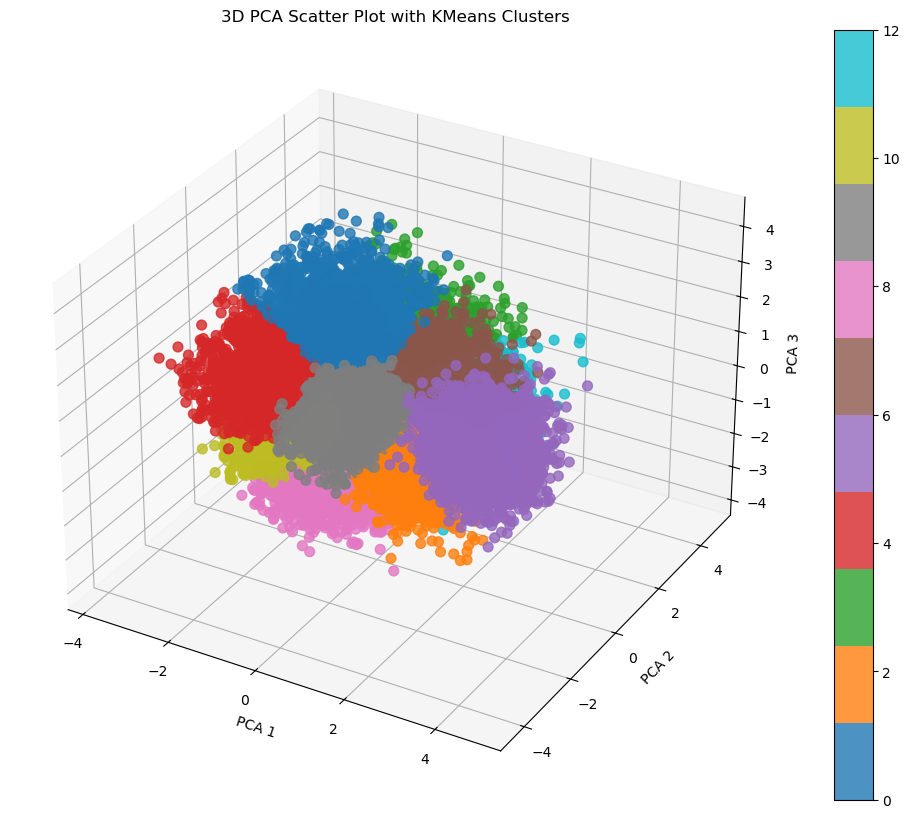

In [20]:
#Plot with PCA with 3D graph

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(ds_pca[:, 0], ds_pca[:, 1], ds_pca[:, 2], c=clusters, cmap='tab10', s=50, alpha=0.8)
ax.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)

# Add labels
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('3D PCA Scatter Plot with KMeans Clusters')

# Add a colorbar
plt.colorbar(sc)
plt.show()


### With PCA we are able to achieve the best clusters

In [39]:
# Reintroducing cluster to dataset

df_music["Cluster"] = kmeans_scaled.fit_predict(ds_pca)

In [40]:
# Read train dataset, 
orgin_df = pd.read_csv("/Users/sa19/Desktop/Music_Recommendation_Algorithm/Data/train.csv")


# Drop Unnamed from dataset
label1= orgin_df[["genre","artist_name","track_name", "release_date"]]

label1 = pd.concat([label1, df_music], axis=1)

label1

,genre,artist_name,track_name,release_date,Unnamed: 0,release_date,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,0,1950,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,10
1,pop,frankie laine,i believe,1950,1,1950,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,6
2,pop,johnnie ray,cry,1950,2,1950,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,4
3,pop,pérez prado,patricia,1950,3,1950,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,4
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,4,1950,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,28357,2019,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,5
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,28358,2019,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,2
28359,hip hop,nine,whutcha want?,2019,28359,2019,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,2
28360,hip hop,will smith,switch,2019,28360,2019,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,7


In [41]:
#Lets see how many songs are in each cluster
orgin_df["Cluster"].value_counts().sort_index().to_frame(name='Count')

KeyError: 'Cluster'